In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Load and analysis data

In [2]:
genders=df.iloc[:,4].values
gender_digit=[]
for gender in genders:
    if(gender=="male"):
        gender_digit.append(1)
    
    else:
        gender_digit.append(0)


In [3]:
embarkeds = df["Embarked"].values
embarked_digit = []
for embarked in embarkeds:
    if(embarked=="S"):
        embarked_digit.append(0)
    elif(embarked=="Q"):
        embarked_digit.append(1)
    else:
        embarked_digit.append(2)

In [4]:
ages=np.array(df["Age"].values)
ages[np.isnan(ages)]=0
ages=np.nan_to_num(ages)
mean_age=np.mean(ages)
ages[ages==0] = int(mean_age)
ages=list(map(int,ages))

In [5]:
# Get train data and labels
# PassengerId=df.iloc[:,0].values
y_label=np.array(df["Survived"].values)
Pclass=np.array(df["Pclass"].values)
# gender_digit
# ages
SibSp=np.array(df["SibSp"].values)
Parch=np.array(df["Parch"].values)
Fare =np.array(df["Fare"].values)
Fare = list(map(int,Fare))
# embarked_digit
X_train=np.vstack((Pclass,gender_digit,ages,SibSp,Parch,Fare,embarked_digit)).T
X_train_without_fare=np.vstack((Pclass,gender_digit,ages,SibSp,Parch,embarked_digit)).T
X_train_without_FE=np.vstack((Pclass,gender_digit,ages,SibSp,Parch)).T
print("Training data shape:",X_train.shape)
print("Training label shape:",y_label.shape)

Training data shape: (891, 7)
Training label shape: (891,)


In [6]:
# Get test data and labels
df_test = pd.read_csv("test.csv")
Pclass=np.array(df_test["Pclass"].values)
genders=np.array(df_test["Sex"].values)
genders[genders=="male"]=1
genders[genders=="female"]=0
ages=np.array(df_test["Age"].values)
ages[np.isnan(ages)]=0
mean_age=int(np.mean(ages))
ages[ages==0] = mean_age
ages = list(map(int,ages))
SibSp=np.array(df_test["SibSp"].values)
Parch=np.array(df_test["Parch"].values)
Fare =np.array(df_test["Fare"].values)
Fare = list(map(int,Fare))
embarkeds = df_test["Embarked"].values
embarked_digit = []
for embarked in embarkeds:
    if(embarked=="S"):
        embarked_digit.append(0)
    elif(embarked=="Q"):
        embarked_digit.append(1)
    else:
        embarked_digit.append(2)
X_test=np.vstack((Pclass,genders,ages,SibSp,Parch,Fare,embarked_digit)).T
X_test_without_fare=np.vstack((Pclass,genders,ages,SibSp,Parch,embarked_digit)).T
X_test_without_FE=np.vstack((Pclass,genders,ages,SibSp,Parch)).T
print("Test data shape:",X_test.shape)

Test data shape: (418, 7)


In [7]:
df_test_label = pd.read_csv("gender.csv")
y_test=df_test_label["Survived"].values
print("Test label shape:",y_test.shape)

Test label shape: (418,)


In [8]:
from classifiers import KNN
classifier_L1 = KNN()
classifier_L1.train(X_train,y_label)
y_pred=classifier_L1.predict(X_test,k=1,L=1)

In [9]:
num_test=y_test.shape[0]
accurancy=np.sum(y_test==y_pred)/num_test
print("Test Accurancy(L1,k=1):",accurancy)

Test Accurancy(L1,k=1): 0.6148325358851675


In [10]:
classifier_L2 = KNN()
classifier_L2.train(X_train,y_label)
y_pred=classifier_L2.predict(X_test,k=1,L=2)
num_test=y_test.shape[0]
accurancy=np.sum(y_test==y_pred)/num_test
print("Test Accurancy(L2,k=1):",accurancy)

Test Accurancy(L2,k=1): 0.6985645933014354


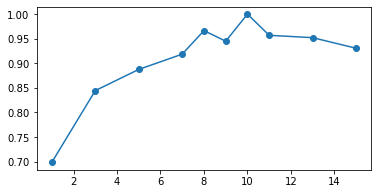

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
accurancy_list=[]
k_zip= [1,3,5,7,8,9,10,11,13,15]
for k in k_zip:
    classifier_L2 = KNN()
    classifier_L2.train(X_train,y_label)
    y_pred=classifier_L2.predict(X_test,k=k,L=2)
    num_test=y_test.shape[0]
    accurancy=np.sum(y_test==y_pred)/num_test
    accurancy_list.append(accurancy)
ax.plot(k_zip,accurancy_list,'-o')

In [12]:
print("The max accurancy is %.2f, and K =10." % np.max(accurancy_list))

The max accurancy is 1.00, and K =10.


The max accurancy is 0.77, and K =10.


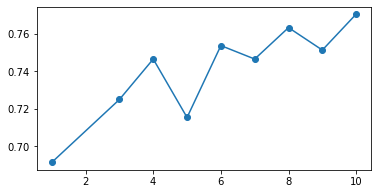

In [13]:
# Without Fare
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
accurancy_list=[]
k_zip= [1,3,4,5,6,7,8,9,10]
for k in k_zip:
    classifier_L2 = KNN()
    classifier_L2.train(X_train_without_fare,y_label)
    y_pred=classifier_L2.predict(X_test_without_fare,k=k,L=2)
    num_test=y_test.shape[0]
    accurancy=np.sum(y_test==y_pred)/num_test
    accurancy_list.append(accurancy)
ax.plot(k_zip,accurancy_list,'-o')
print("The max accurancy is %.2f, and K =10." % np.max(accurancy_list))

The max accurancy is 0.78, and K =8.


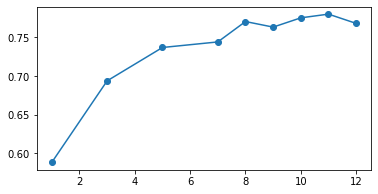

In [14]:
# Without Fare and Embarked
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
accurancy_list=[]
k_zip= [1,3,5,7,8,9,10,11,12]
for k in k_zip:
    classifier_L2 = KNN()
    classifier_L2.train(X_train_without_FE,y_label)
    y_pred=classifier_L2.predict(X_test_without_FE,k=k,L=2)
    num_test=y_test.shape[0]
    accurancy=np.sum(y_test==y_pred)/num_test
    accurancy_list.append(accurancy)
ax.plot(k_zip,accurancy_list,'-o')
print("The max accurancy is %.2f, and K =8." % np.max(accurancy_list))

In [15]:
# Data without F and E, K=10, L=2
import csv
classifier_L2 = KNN()
classifier_L2.train(X_train_without_fare,y_label)
y_pred=classifier_L2.predict(X_test_without_fare,k=8,L=2)
pred=list(y_pred)
pred = [str(x) for x in pred]
with open('output.csv', 'w', newline='') as f:  
    writer = csv.writer(f) 
    writer.writerow(pred) 
 

In [16]:
df = pd.read_csv("train.csv")
Pclass=np.array(df["Pclass"].values)
gender=np.array(df["Sex"].values)
gender[gender=="male"]=1
gender[gender=="female"]=0

ages=df["Age"].values
ages[np.isnan(ages)]=0
ages=np.nan_to_num(ages)
mean_age=np.mean(ages)
ages[ages==0] = int(mean_age)
ages=np.array(list(map(int,ages)))
num = max(ages)-min(ages)
minNum=min(ages)
ages=(ages-minNum)/num*10
ages=list(map(int,ages))

SibSp=np.array(df["SibSp"].values)
Parch=np.array(df["Parch"].values)
embarked=np.array(df["Embarked"].values)
embarked[embarked=="S"]=0
embarked[embarked=="C"]=1
embarked[embarked=="Q"]=2
X_train=np.vstack((Pclass,gender,ages,SibSp,Parch,embarked)).T
y_label=np.array(df["Survived"].values)
X_train.shape

(891, 6)

# Data scaling

In [17]:
df = pd.read_csv("test.csv")
Pclass=np.array(df["Pclass"].values)
gender=np.array(df["Sex"].values)
gender[gender=="male"]=1
gender[gender=="female"]=0

ages=df["Age"].values
ages[np.isnan(ages)]=0
ages=np.nan_to_num(ages)
mean_age=np.mean(ages)
ages[ages==0] = int(mean_age)
ages=np.array(list(map(int,ages)))
num = max(ages)-min(ages)
minNum=min(ages)
ages=(ages-minNum)/num*10
ages=list(map(int,ages))

SibSp=np.array(df["SibSp"].values)
Parch=np.array(df["Parch"].values)
embarked=np.array(df["Embarked"].values)
embarked[embarked=="S"]=0
embarked[embarked=="C"]=1
embarked[embarked=="Q"]=2
X_test=np.vstack((Pclass,gender,ages,SibSp,Parch,embarked)).T
X_test.shape

(418, 6)

In [18]:
df_test_label = pd.read_csv("gender.csv")
y_test=df_test_label["Survived"].values
print("Test label shape:",y_test.shape)

Test label shape: (418,)


The max accurancy is 0.80, and K =8.


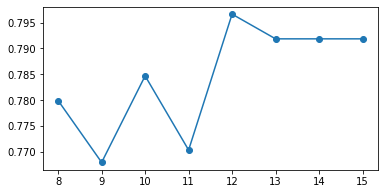

In [19]:
from classifiers import KNN
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
accurancy_list=[]
k_zip= [8,9,10,11,12,13,14,15]
for k in k_zip:
    classifier_L2 = KNN()
    classifier_L2.train(X_train,y_label)
    y_pred=classifier_L2.predict(X_test,k=k,L=2)
    num_test=y_test.shape[0]
    accurancy=np.sum(y_test==y_pred)/num_test
    accurancy_list.append(accurancy)
ax.plot(k_zip,accurancy_list,'-o')
print("The max accurancy is %.2f, and K =8." % np.max(accurancy_list))

In [20]:
classifier_L2 = KNN()
classifier_L2.train(X_train,y_label)
y_pred=classifier_L2.predict(X_test,k=12,L=2)
num_test=y_test.shape[0]
accurancy=np.sum(y_test==y_pred)/num_test

In [21]:
import csv
pred=list(y_pred)
pred = [str(x) for x in pred]
with open('output.csv', 'w', newline='') as f:  
    writer = csv.writer(f) 
    writer.writerow(pred) 